# SONGS RECOMMENDATION BASED ON THE SPOTIFY DATASET 

## Introduction

The goal is to understand and build a program that recommend songs like spotify does. In first place, we get the data used in here in the spotify to developers page, but someone could find it in another place. The songs features analyzed in here will be : 

* acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* danceability - describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* duration_ms - The duration of the track in milliseconds.
* id - The Spotify ID for the track.
* instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
*liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* loudness- The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* name - Song's name 
* speechiness - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* time_signature - An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
* valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* year - The year of release.

In [ ]:
# importing the libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [ ]:
#importing data 
data = pd.read_csv('Dados_totais.csv') #general data
data_genres = pd.read_csv('data_by_genres.csv') #data about the genres
data_year = pd.read_csv('data_by_year.csv') # data about the years

## Data exploration

Let's explore the data in order to see if it's missing some value and try to find some interesting feature of the data

In [ ]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,0,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,0,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [ ]:
data.shape

(20311, 19)

In [ ]:
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [ ]:
data.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

So we have 20311 songs with 19 atributes, it's seems that's possible to train the program to recommend a next song to the listener. In addition there's no null or Nan values.

Observe that we have some columns that doesn't influences in a song recommendation, like the key, id, mode and explicit.

In [ ]:
data.drop(['explicit','mode','key'],inplace=True,axis=1)

In [ ]:
data.shape

(20311, 16)

Now let's look to the data_genre

In [ ]:
data_genres.head(2)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.3616,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.1310,-16.854000,0.076817,120.285667,0.221750,52.500000,5


In [ ]:
data_genres.drop(['key','mode'],inplace=True,axis=1)

Now let's look to data_year

In [ ]:
data_year.head(2)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.24072,-19.275282,0.116655,100.884521,0.535549,0.140845,10


In [ ]:
data_year.drop(['mode','key'],inplace=True,axis=1)

The ideia is to cross the datas between the datasets. We see that both 'data' and 'data_year' have the column 'year'. Let's investigate what value this column take in each one.

In [ ]:
data['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
data_year['year'].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

So, the data_year goes from 1921 to 2020 while data just goes until 2000. Then, we can discard from 1921 to 2000 in data_year.

In [ ]:
data_year=data_year[data_year['year'] >= 2000]
data_year.shape

(21, 12)

In [ ]:
data_year=data_year.reset_index()
data_year.head(2)

,index,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,79,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049
1,80,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125


## Data visualization

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_year['year'],y=data_year['acousticness'],name='acousticness'))
fig.add_trace(go.Scatter(x=data_year['year'],y=data_year['danceability'],name='danceability'))
fig.add_trace(go.Scatter(x=data_year['year'],y=data_year['energy'],name='energy'))
fig.add_trace(go.Scatter(x=data_year['year'],y=data_year['instrumentalness'],name='instrumentalness'))
fig.add_trace(go.Scatter(x=data_year['year'],y=data_year['speechiness'],name='speechiness'))
fig.add_trace(go.Scatter(x=data_year['year'],y=data_year['valence'],name='valence'))
fig.show()

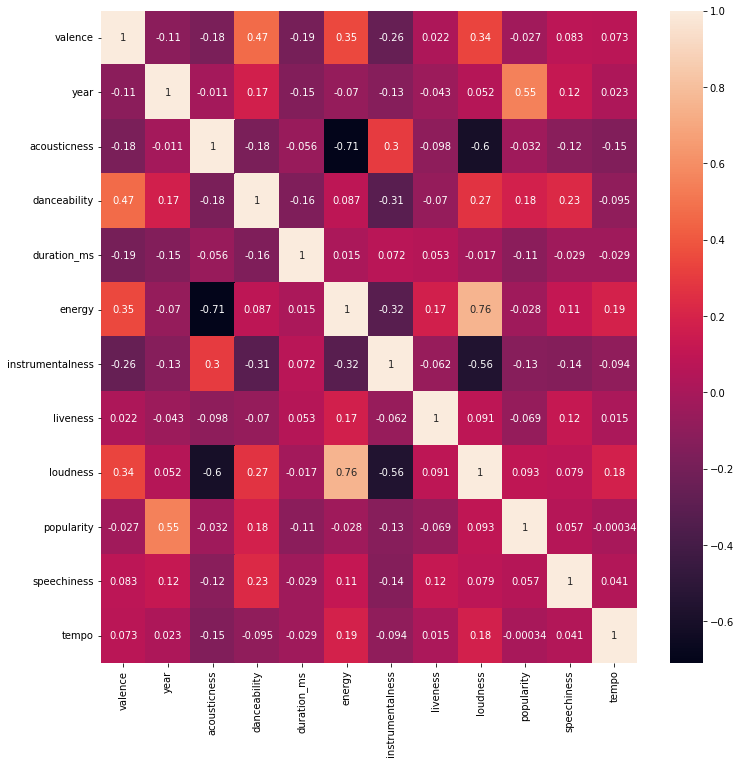

In [ ]:
figura = plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

We can some features of the data: energy and acousticness have a inverse correlation as we could expect as loudness and acousticness.

## Applying ML

The data_genres only have one column that is a string and it's the genres. As we have one genre for row we can drop this column as well

### Clustering by genres

In [ ]:
genre1 = data_genres.drop(['genres'],axis=1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
pca_pipeline = Pipeline([('Scaler',StandardScaler()),('PCA',PCA(n_components=2,random_state=1))])

In [ ]:
genre_pca = pca_pipeline.fit_transform(genre1)
projection = pd.DataFrame(columns=['x','y'],data=genre_pca)

In [ ]:
projection

,x,y
0,5.910268,-0.011146
1,2.787093,4.498483
2,-0.757538,-1.258495
3,1.020521,-0.931690
4,0.753911,-0.999861
...,...,...
2968,-0.475136,-0.017126
2969,-3.026756,-1.304983
2970,-0.832511,-1.089726
2971,1.774790,-3.695233


To classify the data we need a unsupervised learning algorithm, in here I'm using the "k-means".

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1, 11):
  #print(i)
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(projection)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[16112.987192854529,
 8008.287217655081,
 5731.800330065181,
 4073.23518183027,
 3500.778348405878,
 2997.4777445540713,
 2599.8871114816566,
 2364.6951380471073,
 2142.5680343338436,
 1947.146928252178]

In [ ]:
grafico = px.line(x = range(1,11), y = wcss)
grafico.show()

Now we know that 4 clusters is enough to this project

In [ ]:
kmeans_pca = KMeans(n_clusters=4,verbose=False,random_state=1)
kmeans_pca.fit(projection)
data_genres['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

In [ ]:
projection['genres'] = data_genres['genres']

In [ ]:
fig = px.scatter ( projection, x='x',y='y',color='cluster_pca',hover_data=['x','y','genres'])
fig.show()

In [ ]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.49270669947266377

In [ ]:
pca_pipeline[1].explained_variance_.sum()

5.421597305805694

### Clustering by Song

Before we have clustered the genres of our dataset, now we want to cluster the songs, so we turn to our dataset 'data'.

In [ ]:
data.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson


In [ ]:
print('Number of artists that appears in dataframe:',len(data['artists'].value_counts()))
print('Number of artists_song that appears in dataframe:',len(data['artists_song'].value_counts()))

Number of artists that appears in dataframe: 875
Number of artists_song that appears in dataframe: 20311


As we have more artists_song (obvious because some artist have several songs) it's easy to encode the artist. To this goal we're using one_hot_encoder.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(dtype=int)
columns_ohe = ohe.fit_transform(data[['artists']]).toarray()
data2 = data.drop(['artists'],axis=1)
data_songs_dummies = pd.concat([data2,pd.DataFrame(columns_ohe,columns = ohe.get_feature_names_out(['artists']))],axis=1)
data_songs_dummies

,valence,year,acousticness,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,...,artists_Zara Larsson,artists_Zedd,artists_alt-J,artists_blackbear,artists_blink-182,artists_deadmau5,artists_for KING & COUNTRY,artists_fun.,artists_girl in red,artists_iann dior
0,0.285,2000,0.00239,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,...,0,0,0,0,0,0,0,0,0,0
1,0.613,2000,0.14300,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,...,0,0,0,0,0,0,0,0,0,0
2,0.400,2000,0.00958,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,...,0,0,0,0,0,0,0,0,0,0
3,0.543,2000,0.00664,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,...,0,0,0,0,0,0,0,0,0,0
4,0.760,2000,0.03020,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,0.187,2020,0.57400,0.445,176250,0.330,0PUkanqCGTb6qseXPKOw1F,0.000000,0.1020,-8.121,...,0,0,0,0,0,0,0,0,0,0
20307,0.240,2020,0.81500,0.467,179188,0.429,6Iw6fQVKZi0fWtEQBrTFcP,0.000052,0.1770,-8.689,...,0,0,0,0,0,0,0,0,0,0
20308,0.466,2020,0.31000,0.562,253613,0.686,308prODCCD0O660tIktbUi,0.022500,0.1250,-8.480,...,0,0,0,0,0,0,0,0,0,0
20309,0.522,2020,0.20400,0.598,230600,0.472,2f8y4CuG57UJEmkG3ujd0D,0.000015,0.1080,-10.991,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pca_pipeline = Pipeline([('Scaler',StandardScaler()),('PCA',PCA(n_components=0.7,random_state=1))])
songs_pca = pca_pipeline.fit_transform(data_songs_dummies.drop(['id','name','artists_song'],axis=1))
projection_m = pd.DataFrame(data=songs_pca)

In [ ]:
kmeans_pca_m = KMeans(n_clusters=40,verbose=False,random_state=1)
kmeans_pca_m.fit(projection_m)
data['cluster_pca'] = kmeans_pca_m.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_m.predict(projection_m)

In [ ]:
projection_m['artist'] = data['artists']
projection_m['song'] = data['artists_song']


In [ ]:
projection_m.head(2)

,0,1,2,3,4,5,6,7,8,9,...,605,606,607,608,609,610,611,cluster_pca,artist,song
0,0.174796,0.731252,2.186797,-0.767192,0.594847,0.315968,-0.412322,-0.479171,-2.700668,2.109956,...,-0.009111,0.005154,-0.034027,-0.032617,-2.448503e-12,5.916867e-12,3.121908e-12,8,Coldplay,Coldplay - Yellow
1,-1.358420,0.052935,-1.789973,1.938444,0.403606,1.023898,-1.172118,0.821698,-1.716897,0.252498,...,-0.031986,0.029708,-0.016322,-0.030234,1.249715e-13,-1.457579e-12,-2.040535e-13,8,OutKast,OutKast - Ms. Jackson


In [ ]:
fig = px.scatter ( projection_m, x=0,y=1,color='cluster_pca',hover_data=[0,1,'song'])
fig.show()

In [ ]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.700000846318703

In [ ]:
pca_pipeline[1].explained_variance_.sum()

620.9313218688691

## Recommendation based on distance 

Let's choose a song that the program will take as base to recommend another one. The song I take was 'Kendrick Lamar - Money Trees'. Now we need: 
1) Found out which cluster this songs belongs

2) what are the others songs in this cluster

3) calculate the (Euclidian) distance between the others songs and mine

4) sort the songs and show 

In [ ]:
data[data['artists'] == 'Beyoncé']

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song,cluster_pca
405,0.681,2003,0.00249,Beyoncé,0.646,236133,0.770,5IVuqXILoxVWvWEPm82Jxr,0.000000,0.0715,-6.596,Crazy In Love (feat. Jay-Z),76,0.2260,99.165,Beyoncé - Crazy In Love (feat. Jay-Z),8
428,0.536,2003,0.22600,Beyoncé,0.750,301133,0.458,6XsT5UGfpaFeHQf5LRIy4W,0.000033,0.1370,-9.092,"Me, Myself and I",65,0.0803,83.610,"Beyoncé - Me, Myself and I",8
476,0.791,2003,0.08250,Beyoncé,0.655,244827,0.488,4WY3HyGXsWqjFRCVD6gnTe,0.000001,0.2210,-9.170,Baby Boy (feat. Sean Paul),66,0.2200,91.025,Beyoncé - Baby Boy (feat. Sean Paul),8
489,0.659,2003,0.23700,Beyoncé,0.588,208573,0.461,0YGQ3hZcRLC5YX7o0hdmHg,0.000015,0.0913,-8.686,Naughty Girl,62,0.1610,200.053,Beyoncé - Naughty Girl,8
510,0.459,2003,0.34500,Beyoncé,0.609,293133,0.407,0KFuXEdOp5QfIfxHR6TJSm,0.000000,0.1900,-8.026,Dangerously In Love,58,0.0808,99.982,Beyoncé - Dangerously In Love,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19070,0.887,2005,0.07010,Beyoncé,0.702,210427,0.890,49YeEoXjdJBaVOjghMPEdR,0.000000,0.3850,-3.794,Check On It (feat. Slim Thug),44,0.2140,166.115,Beyoncé - Check On It (feat. Slim Thug),8
19264,0.625,2007,0.23400,Beyoncé,0.664,248853,0.701,30Z84zKyyx3Hn2Af8OdwaR,0.001170,0.0646,-7.718,Flaws and All,44,0.0967,151.947,Beyoncé - Flaws and All,8
19438,0.745,2009,0.04510,Beyoncé,0.692,217280,0.727,4qwT6ISA0clmfsFSTjd9Hb,0.000002,0.0568,-4.562,Why Don't You Love Me,43,0.0868,136.870,Beyoncé - Why Don't You Love Me,8
19543,0.398,2011,0.19300,Beyoncé,0.474,199107,0.797,6QFgpUiLoXlmYDjbe0tjyP,0.000006,0.3220,-4.541,Start Over,49,0.1910,150.006,Beyoncé - Start Over,8


In [ ]:
song = "Beyoncé - Crazy In Love (feat. Jay-Z)"
cluster = list(projection_m[projection_m['song']==song]['cluster_pca'])[0] # 1 
songs_alike = projection_m[projection_m['cluster_pca']==cluster][[0,1,'song']] #2
x_song = list(projection_m[projection_m['song']==song][0])[0] #3
y_song = list(projection_m[projection_m['song']==song][1])[0] #3

In [ ]:
from sklearn.metrics import euclidean_distances
dist = euclidean_distances(songs_alike[[0,1]],[[x_song,y_song]])
songs_alike['id'] = data['id']
songs_alike['dist'] = dist
songs_alike['link'] = 'https://open.spotify.com/track/' + data['id']
recommendation = songs_alike.sort_values('dist')
recommendation

,0,1,song,id,dist,link
405,-1.062228,-0.328550,Beyoncé - Crazy In Love (feat. Jay-Z),5IVuqXILoxVWvWEPm82Jxr,0.000000,https://open.spotify.com/track/5IVuqXILoxVWvWE...
18310,-1.069902,-0.331436,Britney Spears - Make Me... (feat. G-Eazy),0nUGa8WQpQqg2vzJUprEo5,0.008199,https://open.spotify.com/track/0nUGa8WQpQqg2vz...
596,-1.056961,-0.353022,Eminem - Ass Like That,4gXdMZkBN1neE9nX6yRALa,0.025033,https://open.spotify.com/track/4gXdMZkBN1neE9n...
4777,-1.035346,-0.353843,Coldplay - Adventure of a Lifetime,69uxyAqqPIsUyTO8txoP2M,0.036910,https://open.spotify.com/track/69uxyAqqPIsUyTO...
19711,-1.096247,-0.304069,J Boog - Leaving With Me,0jREd56kAWsJUGsQbBsWPl,0.041912,https://open.spotify.com/track/0jREd56kAWsJUGs...
...,...,...,...,...,...,...
14424,0.085720,6.462504,Thunder - Shes So Fine,4r8RU5HQen9mj1GecekatQ,6.887394,https://open.spotify.com/track/4r8RU5HQen9mj1G...
14428,0.895641,6.304859,Thunder - Loser,6CK4WhZOGEMW0iTHOOGegq,6.916312,https://open.spotify.com/track/6CK4WhZOGEMW0iT...
14423,0.647735,6.450275,Thunder - I Love You More Than Rock Nroll,2LO3oFdpgEN7wK8I1y3M9F,6.991169,https://open.spotify.com/track/2LO3oFdpgEN7wK8...
14436,1.130308,6.352229,Thunder - Empty City,00bN1hDcNbNiQXs49U2BOF,7.031360,https://open.spotify.com/track/00bN1hDcNbNiQXs...


## The albums of the Songs recommended

In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spotipy 
from spotipy.oauth2 import SpotifyOAuth,SpotifyClientCredentials

In [ ]:
OAuth = SpotifyOAuth(
        scope="user-library-read playlist-modify-private",  
        redirect_uri='http://localhost:5000/callback',
        client_id = '11d8934fecea4a729b124875aefdc610',
        client_secret = '6f004760e900478cb0e726f9368e14d2')

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id = '11d8934fecea4a729b124875aefdc610',client_secret = '6f004760e900478cb0e726f9368e14d2')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

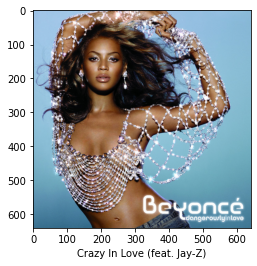

In [ ]:
from skimage import io
song = "Beyoncé - Crazy In Love (feat. Jay-Z)"
id = list(recommendation[recommendation['song'] == song]['id'])[0]
track = sp.track(id)
url=track['album']['images'][0]['url']
name = track['name']
image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
plt.show()

In [ ]:
def rec(music):
  id = list(recommendation[recommendation['song'] == music]['id'])[0]
  track = sp.track(id)
  url=track['album']['images'][0]['url']
  name = track['name']
  image = io.imread(url)
  return image

In [ ]:
save_im=[]
for i in range (10):
  music = list(recommendation['song'])[i]
  save_im.append(rec(music))

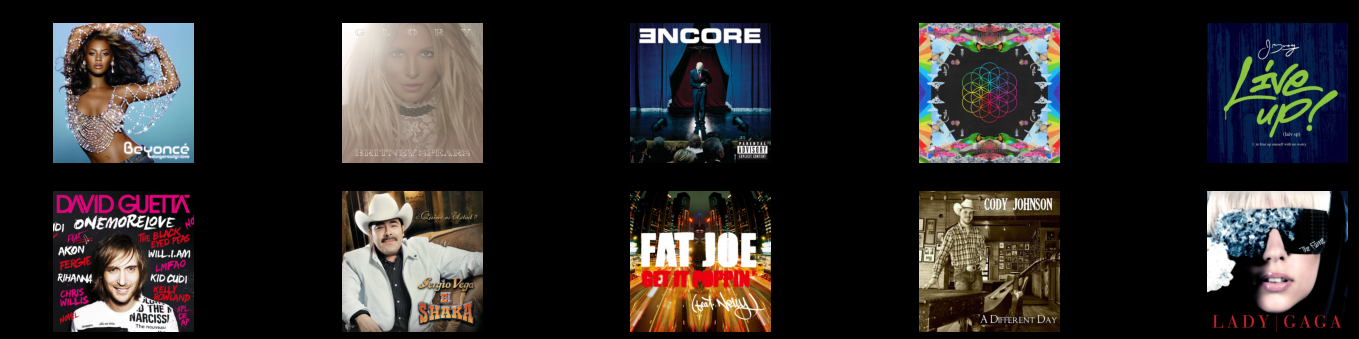

In [ ]:
import matplotlib.cm as cm
w = 10
h = 10
fig = plt.figure(figsize=(25, 15))
columns = 5
rows = 5
for i in range(1, 11):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.title(list(recommendation['song'])[i-1],color='k')
    im = plt.imshow(save_im[i-1])
    im.set_url(list(recommendation['link'])[i-1])
    plt.axis('off')
    fig.patch.set_facecolor('k')
fig.show()
fig.savefig('songs.svg')

The picture above will be saved as '.svg' and every image has a link that goes to spotify where you can listen the song if you click on the image. Below is the links of each song.

In [ ]:
for i in range(1, 11):
  print(list(recommendation['song'])[i-1],':',list(recommendation['link'])[i-1])

Beyoncé - Crazy In Love (feat. Jay-Z) : https://open.spotify.com/track/5IVuqXILoxVWvWEPm82Jxr
Britney Spears - Make Me... (feat. G-Eazy) : https://open.spotify.com/track/0nUGa8WQpQqg2vzJUprEo5
Eminem - Ass Like That : https://open.spotify.com/track/4gXdMZkBN1neE9nX6yRALa
Coldplay - Adventure of a Lifetime : https://open.spotify.com/track/69uxyAqqPIsUyTO8txoP2M
J Boog - Leaving With Me : https://open.spotify.com/track/0jREd56kAWsJUGsQbBsWPl
David Guetta - Sexy Chick (feat. Akon) : https://open.spotify.com/track/4MKzCHlZvkwJOQRNkdw4zq
Sergio Vega El Shaka - La Número 20 : https://open.spotify.com/track/4dmOQs3LUlmxGenu1GxogE
Fat Joe - Get It Poppin' (feat. Nelly) - Radio Version : https://open.spotify.com/track/3zdDxhDo5SycC7XSAPfdjv
Cody Johnson - Diamond In My Pocket : https://open.spotify.com/track/24Nt4OalWDICkEKVy81X6k
Lady Gaga - Starstruck : https://open.spotify.com/track/2DLsZCx5UEqVB3vY3kZWWB


## Conclusions 
We concluded our goal to buil a song reccomendation program. The program in first place analyze some songs features and how it evolves in time. In a next program we can go deep in this analyzes and see how songs envolves in the history music. The second part of the program has a goal of build a song recommendation. To this goal we used the K-Means algorithm and used the PCA method to decrease the number of variables, the K-Means algorithm needs this reducion. Then, we use the Euclidean distance to take the songs more alike the song we have based. In the last part, we use a spotify API to get the album cover of the recommended songs and make a image with these covers, the program generates this image that is embbeded with links that sends the reader to the spotify to listen the song recommended.